# Lab 2 - Newton-Raphson Rootfinding Method
## January 30 - February 4, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No. 202103017
## Student 2 Name: Pranav Patel Student 2 ID No. 202103040
## Student 3 Name: Vatsal Shah Student 3 ID No. 202103022
## Date of Submission: $\underline{01/02/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Write a function `mynewtonraphson` that takes in two function names/handles `f` and `df`, and an initial point `x0` and outputs the estimate of the root `r` of the function `f` 

In [3]:
# Write the Function mynewtonraphson below:
# def mynewtonraphson(f,df,x0):
# Run this function everytime we try for a new equation.

itr = []
ratioArray1 = []
ratioArray2 = []
x_n = []

def mynewtonraphson(f,df,x0, root):
    global itr
    global ratioArray1
    global ratioArray2
    global x_n
    # x0 is the initial guess
    # f is the function
    # df is the derivative of the function
    # x is the solution
    # x = x0
    iter = 0
    itr = np.append(itr, iter)
    x = x0
    x_n = np.append(x_n, x)
    error = 1 
    while (abs(error) > 1e-10):
        iter = iter + 1
        itr = np.append(itr, iter)
        # x = x - f(x)/df(x)
        x1 = x - f(x)/df(x)
        x_n = np.append(x_n, x1)
        error = x1 - x
        print("Error: ", error,"x: ",  x, "x1: ", x1)
        
        if(x1 == root):
          print(x,' ',root, ' ', x1)
          return x1

        ratio1 = abs(x1 - root)/abs(x - root)
        ratio2 = abs(x1- root)/((x-root)**2)
        # print(ratio1,' ',ratio2)
        x = x1

        ratioArray1 = np.append(ratioArray1, ratio1)
        ratioArray2 = np.append(ratioArray2, ratio2)
    print("Number of iterations: ", iter)
    return x

***
### Q.2 For a few examples of different functions, plot $\frac{|x_{n+1} - r|}{|x_{n} - r|}$ and $\frac{|x_{n+1} - r|}{|x_{n} - r|^2}$ against $n$. 

Error:  -0.5454545454545454 x:  2 x1:  1.4545454545454546
Error:  -0.3034986651679079 x:  1.4545454545454546 x1:  1.1510467893775467
Error:  -0.12572086040084884 x:  1.1510467893775467 x1:  1.0253259289766978
Error:  -0.024417477033646495 x:  1.0253259289766978 x1:  1.0009084519430513
Error:  -0.0009072166341059784 x:  1.0009084519430513 x1:  1.0000012353089454
Error:  -1.2353066562997839e-06 x:  1.0000012353089454 x1:  1.000000000002289
Error:  -2.2890578321721478e-12 x:  1.000000000002289 x1:  1.0
1.000000000002289   1   1.0


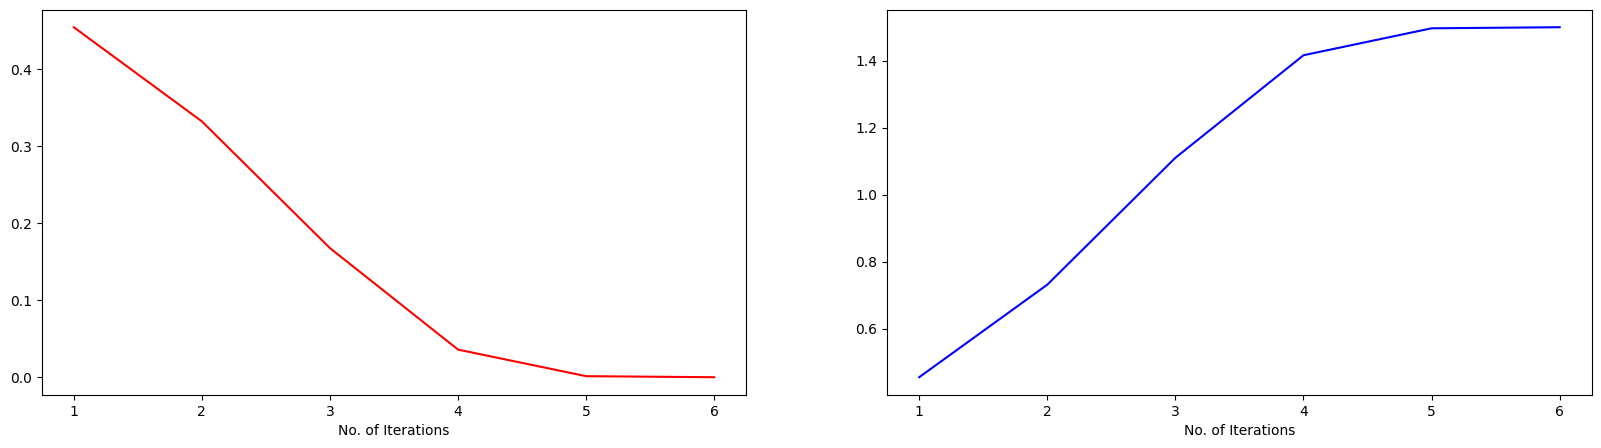

In [4]:
def f(x): # f(x) = x^2 - 2x + 1
    return x**3 -x 
def df(x): # f'(x) = 2x -2 
    return 3*x**2 -1
y = mynewtonraphson(f, df, x0=2, root=1)

fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(itr[1:len(itr)-1], ratioArray1, color='r')
ax[0].set_xlabel('No. of Iterations')


ax[1].plot(itr[1:len(itr)-1], ratioArray2, color='b')
ax[1].set_xlabel('No. of Iterations') 

plt.show()

Error:  12.0 x:  1 x1:  13.0
Error:  -5.538461538461538 x:  13.0 x1:  7.461538461538462
Error:  -2.0555114988104677 x:  7.461538461538462 x1:  5.406026962727994
Error:  -0.39077936078309605 x:  5.406026962727994 x1:  5.015247601944898
Error:  -0.015224423690948896 x:  5.015247601944898 x1:  5.000023178253949
Error:  -2.3178200225792978e-05 x:  5.000023178253949 x1:  5.000000000053723
Error:  -5.3723248072401475e-11 x:  5.000000000053723 x1:  5.0
5.000000000053723   5.0   5.0


ValueError: x and y must have same first dimension, but have shapes (14,) and (12,)

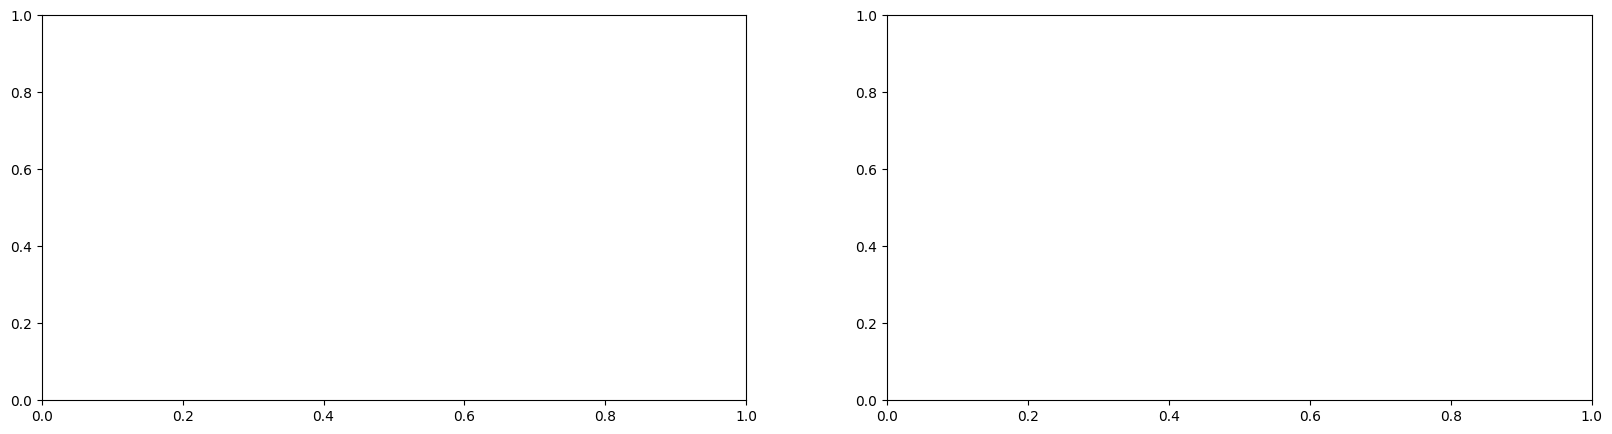

In [5]:
def f1(x): # f(x) = x^2 - 5
  return x**2 - 25

def df1(x):
  return 2*x

y= mynewtonraphson(f1, df1, x0=1, root=5.0)

fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(itr[1:len(itr)-1], ratioArray1, color='r')
ax[0].set_xlabel('No. of Iterations')

# ax[0].legend()

ax[1].plot(itr[1:len(itr)-1], ratioArray2, color='b')
ax[1].set_xlabel('No. of Iterations') 
#ax[1].legend()

plt.show()

***
### Q.3 Compare the speed of covergence of Newton-Raphson method with Bisection method for computing square root of positive numbers by plotting x_n against n, or various initializations x_0

In [6]:
# Copy-paste your Bisection Method code here
nArray = []
cnArray = []
abserrArray =[]
relerrArray= []
ratioArray= []
def f(x, p):
    return x**2-p
def mysquareroot(p, eps, root) :
    global nArray
    global abserrArray
    global relerrArray 
    global ratioArray
    global cnArray
    a = 0
    b = p
    if (f(a, p)*f(b, p) > 0):
        print('Give correct initial values')
        return
    n = 0
    c_n1 = 0

    
    while(n <= math.floor(np.log2(p - 0) - np.log2(eps)) + 1):
        c_n = (a+b)/2
        nArray = np.append(nArray, abs(n))
        cnArray  = np.append(cnArray, c_n)
        abserr = abs(c_n - root)
        print(c_n) # Value of the approximated root at each iteration.
        
        abserrArray = np.append(abserrArray, abserr)
        relerr = abs(c_n - root)/root
        relerrArray = np.append(relerrArray, relerr)
        ratio = abs(c_n - root)/abs(c_n1 - root)
        ratioArray = np.append(ratioArray, ratio)
        
        if (f(a, p)*f(c_n, p) < 0) :
          b = c_n
        elif (f(a, p)*f(c_n, p) > 0) :
          a = c_n
        else : 
          print('hi')
          break
        c_n1 = c_n
        # print(ratio ," ", c_n)
        n+=1
    print(c_n)    

In [7]:
# Run comparison between Bisection method and Newton-Raphson method here
print(mysquareroot(25, math.pow(10,-9), math.sqrt(25)))


12.5
6.25
3.125
4.6875
5.46875
5.078125
4.8828125
4.98046875
5.029296875
5.0048828125
4.99267578125
4.998779296875
5.0018310546875
5.00030517578125
4.999542236328125
4.9999237060546875
5.000114440917969
5.000019073486328
4.999971389770508
4.999995231628418
5.000007152557373
5.0000011920928955
4.999998211860657
4.999999701976776
5.000000447034836
5.000000074505806
4.999999888241291
4.9999999813735485
5.000000027939677
5.000000004656613
4.999999993015081
4.999999998835847
5.00000000174623
5.000000000291038
4.9999999995634425
4.99999999992724
4.99999999992724
None


Text(0, 0.5, 'x_n')

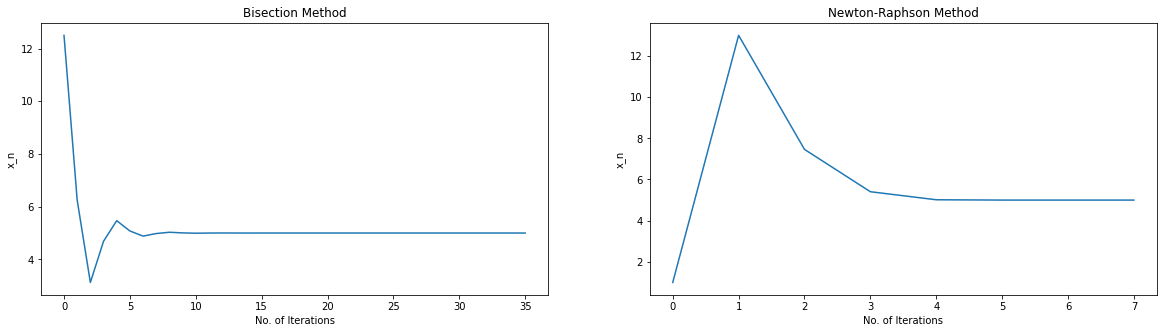

In [ ]:
#plotting graph of x_n vs n for bisection and newton-raphson method


figure, axis = plt.subplots(1, 2, figsize = (20,5))
  
# Bisection Method
axis[0].plot(nArray, cnArray)
axis[0].set_title("Bisection Method")
axis[0].set_xlabel("No. of Iterations")
axis[0].set_ylabel("x_n")
  
# Newton-raphson Method
axis[1].plot(itr, x_n)
axis[1].set_title("Newton-Raphson Method")
axis[1].set_xlabel("No. of Iterations")
axis[1].set_ylabel("x_n")
  


## <font color='red'> A.3: Write your comments/observation here <font>
Here we observe that the Newton-Raphson method converges faster than the bisection method. As we had learnt in theory that the order of convergence of Newton-Raphson method is 2, i.e. quadratic, while that of bisection method is linear. This shows that our method is correctly implemented.

***
### Q.4: Experiment with the Newton-Raphson method for finding roots of the function $f(x) = 2x^3-9x^2+12x+15$, with initial estimate around the point $x=3$. Explain the behaviour

In [ ]:
# Write the Function mynewtonraphson below:
# def mynewtonraphson(f,df,x0):


# itr = []
# # ratioArray1 = []
# # ratioArray2 = []
# x_n = []

def mynewtonraphson(f,df,x0):
    # global itr
    # global ratioArray1
    # global ratioArray2
    # global x_n
    # x0 is the initial guess
    # f is the function
    # df is the derivative of the function
    # x is the solution
    # x = x0
    itr = []
    x_n = []
    iter = 0
    itr = np.append(itr, iter)
    x = x0
    x_n = np.append(x_n, x)
    error = 1 
    while (abs(error) > 1e-10):
        iter = iter + 1
        itr = np.append(itr, iter)
        # x = x - f(x)/df(x)
        x1 = x - f(x)/df(x)
        x_n = np.append(x_n, x1)
        error = x1 - x
        print("Error: ", error,"x: ",  x, "x1: ", x1)
        
        # if(x1 == root):
        #   print(x,' ',root, ' ', x1)
        #   return x1

        # ratio1 = abs(x1 - root)/abs(x - root)
        # ratio2 = abs(x1- root)/((x-root)**2)
        # print(ratio1,' ',ratio2)
        x = x1

        # ratioArray1 = np.append(ratioArray1, ratio1)
        # ratioArray2 = np.append(ratioArray2, ratio2)
    # plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow'])
    plt.plot(itr, x_n, color='r')
    # plt.figure(figsize=(20, 5))
    plt.xlabel('No. of iterations')
    plt.ylabel('x_n')
    # plt.legend(['x0 = 3.5', 'x0 = 2.5', 'x0 = 2.9', 'x0 = 3.1'], loc='valid')
    print("Number of iterations: ", iter)
    return x

In [ ]:
# Write functions for f(x) and df(x) below
# Write functions for f(x) and df(x) below
def f(x): 
  return 2*(x**3) - 9*(x**2) + 12*x + 15
def df(x):
  return  6*(x**2) - 18*x + 12




Error:  -1.4444444444444446 x:  3.5 x1:  2.0555555555555554
Error:  -54.02729044834373 x:  2.0555555555555554 x1:  -51.97173489278817
Error:  17.81965767637508 x:  -51.97173489278817 x1:  -34.15207721641309
Error:  11.876792607079715 x:  -34.15207721641309 x1:  -22.275284609333376
Error:  7.912329618979179 x:  -22.275284609333376 x1:  -14.362954990354197
Error:  5.264206093002418 x:  -14.362954990354197 x1:  -9.09874889735178
Error:  3.488159853023621 x:  -9.09874889735178 x1:  -5.610589044328158
Error:  2.282041783145135 x:  -5.610589044328158 x1:  -3.328547261183023
Error:  1.4337177495082836 x:  -3.328547261183023 x1:  -1.8948295116747396
Error:  0.7931752660033928 x:  -1.8948295116747396 x1:  -1.1016542456713467
Error:  0.302126448628254 x:  -1.1016542456713467 x1:  -0.7995277970430927
Error:  0.04531462219884641 x:  -0.7995277970430927 x1:  -0.7542131748442463
Error:  0.0009708973520161646 x:  -0.7542131748442463 x1:  -0.7532422774922302
Error:  4.4014208588905035e-07 x:  -0.75324

-0.7532418373500538

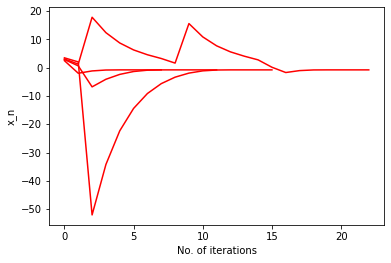

In [ ]:
# Run and plot estimates with different initializations around x=3 here
mynewtonraphson(f,df,3.5)
mynewtonraphson(f,df,2.5)
mynewtonraphson(f,df,2.9) 
mynewtonraphson(f,df,3.1)
# mynewtonraphson(f,df,3)

## <font color='red'> A.4: Write your comments/observation here  <font>
As we can see can see that at values of $x_0$ other than 3 the Newton-Raphson method converges to a root but whereas in the case of $x_0 = 3$ after first iteration $x_1$ becomes equal to 1 and $df(1) = 0$. As $f(x)$ is divided by zero we run into an error here. Graphically speaking, the graph of $f(x)$ has a local maxima at $x=1$.